# Introduction to RNNs

We use a simple Recurrent Neural Network in the tasks of:
* Classification of Roman Numbers in 'even' or 'odd'.
* Prediction of next digit in Roman Numbers.

In [11]:
import utils.sequence_data as sd
import utils.sequence_learning as sl
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch
import numpy as np
from sklearn.metrics import classification_report

In [4]:
folder = "data/roman-numbers"

classification_dataset = sd.SequenceDataset(
    data_path=f"{folder}/classification.csv",
    task_type='classification'
)
classification_test_dataset = sd.SequenceDataset(
    data_path=f"{folder}/classification-test.csv",
    task_type='classification'
)

prediction_dataset = sd.SequenceDataset(
    data_path=f"{folder}/prediction.csv",
    task_type='next_token'
)
prediction_test_dataset = sd.SequenceDataset(
    data_path=f"{folder}/prediction-test.csv",
    task_type='next_token'
)

In [6]:
batch_size = 6
classification_loader = DataLoader(classification_dataset, batch_size=batch_size, shuffle=True)
classification_test_loader = DataLoader(classification_test_dataset, batch_size=batch_size, shuffle=True)
prediction_loader = DataLoader(prediction_dataset, batch_size=batch_size, shuffle=True)
prediction_test_loader = DataLoader(prediction_test_dataset, batch_size=batch_size, shuffle=True)

## Classification with RNN

In [7]:
seq_rnn, seq_rnn_h = sl.training(
    sl.SequenceClassifierRNN, classification_dataset, classification_loader,
    epochs=30
)

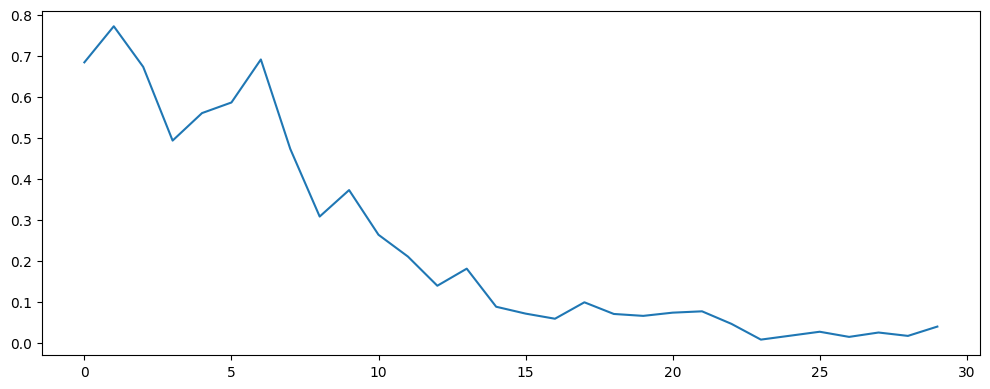

In [9]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(seq_rnn_h)
plt.tight_layout()
plt.show()

In [12]:
test_data_loader = classification_loader
with torch.no_grad():
    y_true, y_pred = [], []
    for i, (batch_sequences, batch_labels) in enumerate(test_data_loader):
        y_true.extend([int(x) for x in list(batch_labels)])
        y_pred.extend([int(np.argmax(p).detach().numpy()) for p in seq_rnn(batch_sequences)])

In [13]:
print(classification_report(y_true=y_true, y_pred=y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       505
           1       1.00      1.00      1.00       495

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



## Prediction with RNNs

In [14]:
seq_rnn, seq_rnn_h = sl.training(
    sl.SequenceClassifierRNN, prediction_dataset, prediction_loader,
    epochs=30
)

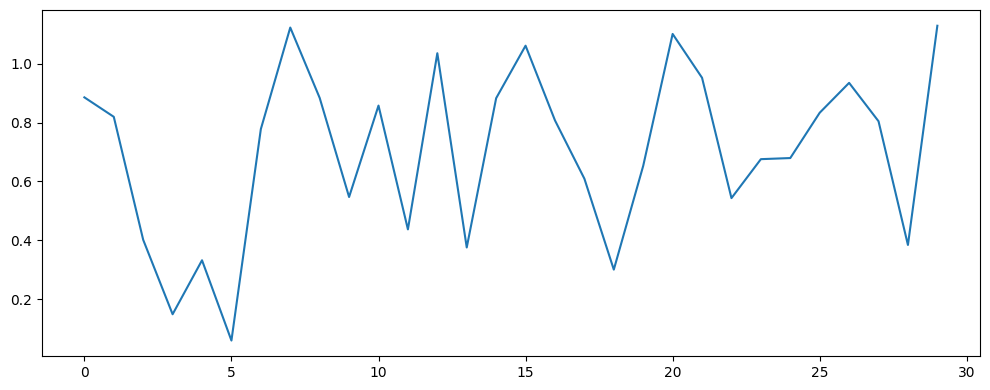

In [15]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(seq_rnn_h)
plt.tight_layout()
plt.show()